<a href="https://colab.research.google.com/github/ym001/distancia/blob/master/notebook/graphDistance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# graphDistance


In [2]:
!pip install distancia==0.0.73

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 6.4 MB/s eta 0:00:00


In [3]:

from distancia import Euclidean, Manhattan

print(Euclidean().calculate([2,3], [3,4]))
print(Manhattan().calculate([2,3], [3,4]))


Le modèle FastText a été créé avec succès.
1.4142135623730951
2


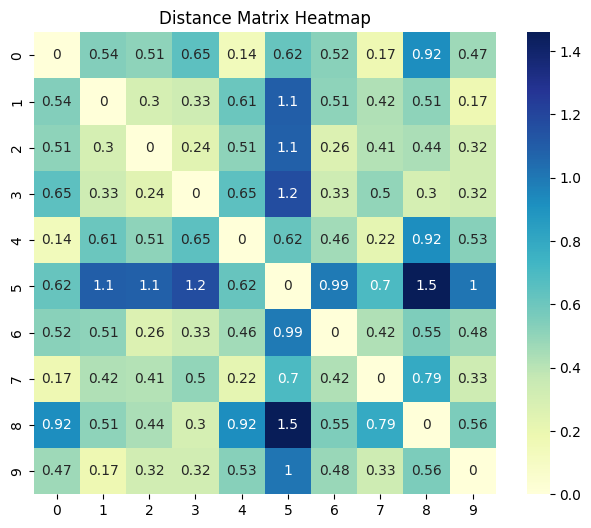

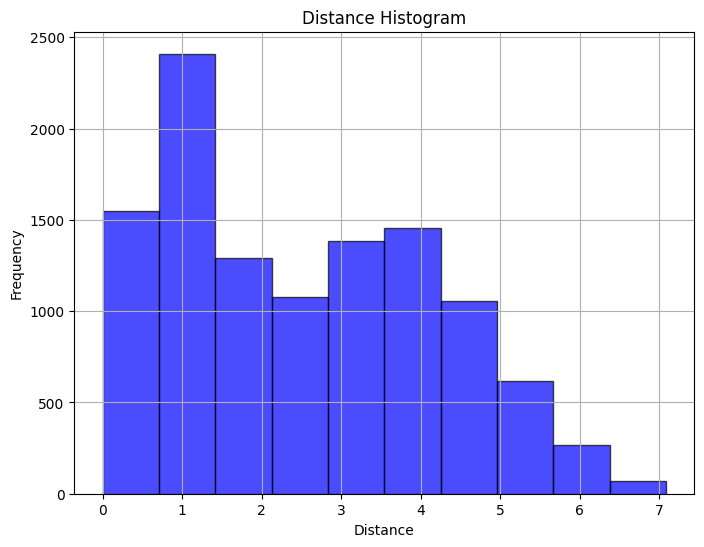

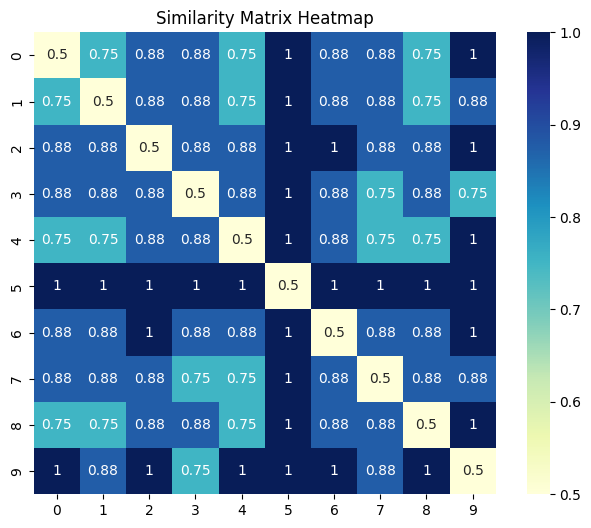

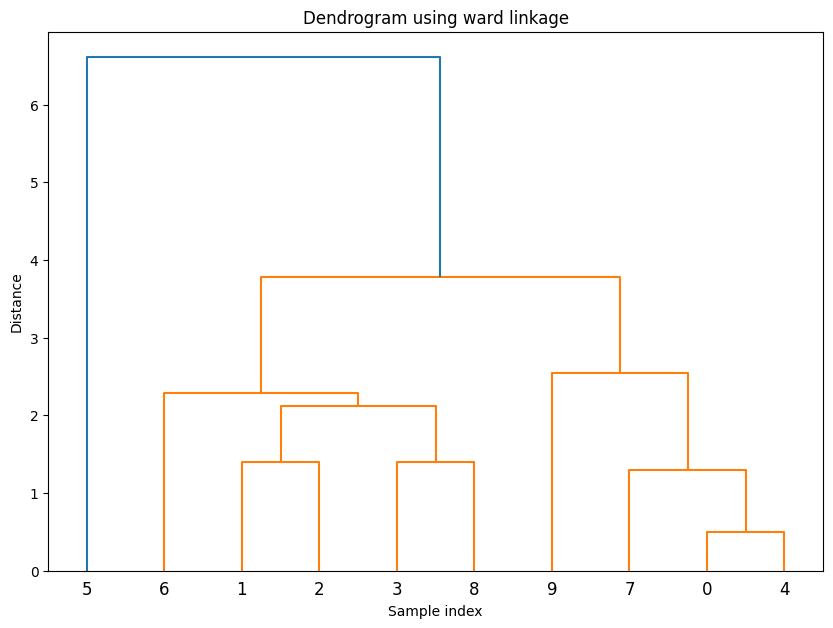

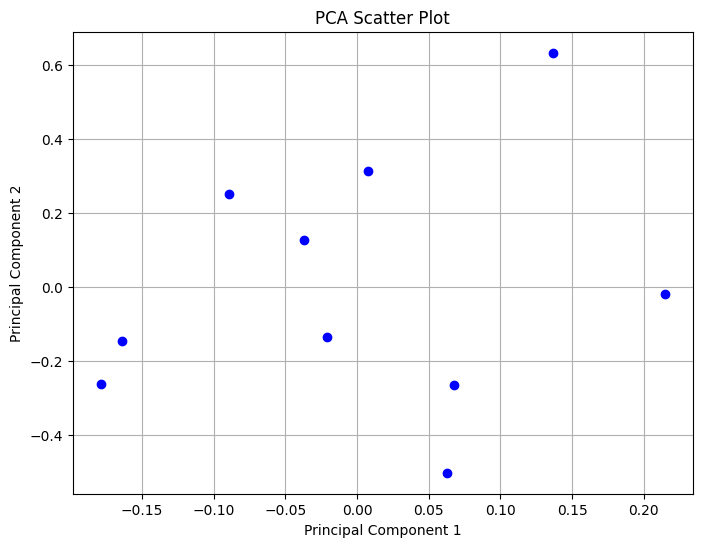

In [4]:
from distancia import Visualization

dataset = [
    [1, 2],
    [2, 3],
    [3, 4],
    [5, 6]
]

from sklearn.datasets import load_iris

# Load the Iris dataset
data, labels = load_iris(return_X_y=True)
visualization = Visualization(Euclidean())

# Plot distance matrix
visualization.plot_distance_matrix(data[:10])

# Plot distance histogram
visualization.plot_distance_histogram(data)

# Plot similarity matrix
visualization.plot_similarity_matrix(data[:10])


# Plot Hierarchical Clustering Dendrogram
visualization.plot_dendrogram(data[:10])

# Plot PCA Scatter Plot
visualization.plot_pca(data[:10], n_components=2)


import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

In [32]:
from distancia import ShortestPath

# Create a weighted, undirected graph
g = Graph(directed=False, weighted=True)

# Add some edges
g.add_edge("A", "B", 4)
g.add_edge("B", "C", 3)
g.add_edge("C", "D", 2)
g.add_edge("D", "A", 5)

# Perform Dijkstra
distance, path = ShortestPath().compute(g,"A", "C")
print(f"Shortest path from A to C: {path}")
print(f"Distance: {distance}")
print(f"Distance between A and C in {g} is {distance:.2f}")

Shortest path from A to C: ['A', 'B', 'C']
Distance: 7
Distance between A and C in <distancia.tools.Graph object at 0x7c2c35e01ba0> is 7.00


In [7]:
from distancia import Graph,GraphEditDistance
edges1 = [("A", "B"), ("B", "C"), ("C", "D"), ("D", "A")]
nodes1 = ["A", "B", "C", "D"]

edges2 = [("A", "B"), ("B", "C"), ("C", "D")]
nodes2 = ["A", "B", "C", "D"]

graph1 = Graph(nodes1, edges1)
graph2 = Graph(nodes2, edges2)

ged_calculator = GraphEditDistance()
distance = ged_calculator.calculate(graph1, graph2)
print(f"The Graph Edit Distance between the two graphs is: {distance}")


The Graph Edit Distance between the two graphs is: 0


In [8]:
from distancia import SpectralDistance
import networkx as nx

def create_sample_graphs():
    # Create a path graph
    P10 = nx.path_graph(10)

    # Create a cycle graph
    C10 = nx.cycle_graph(10)

    # Create a complete graph
    K10 = nx.complete_graph(10)

    # Create two random graphs
    G1 = nx.gnm_random_graph(10, 20)
    G2 = nx.gnm_random_graph(10, 20)

    return P10, C10, K10, G1, G2

def compare_graphs(graphs, names):
    # Initialize SpectralDistance object
    sd = SpectralDistance(k=5, normalized=True)

    print("Spectral distances between graphs:")
    for i, (G1, name1) in enumerate(zip(graphs, names)):
        for j, (G2, name2) in enumerate(zip(graphs[i+1:], names[i+1:])):
            distance = sd.calculate(G1, G2)
            print(f"{name1} vs {name2}: {distance:.4f}")

def main():
    # Create sample graphs
    P10, C10, K10, G1, G2 = create_sample_graphs()
    graph_names = ["Path", "Cycle", "Complete", "Random1", "Random2"]

    # Compare the graphs
    compare_graphs([P10, C10, K10, G1, G2], graph_names)

if __name__ == "__main__":
    main()

Spectral distances between graphs:
Path vs Cycle: 1.0351
Path vs Complete: 1.0969
Path vs Random1: 0.6972
Path vs Random2: 0.6752
Cycle vs Complete: 1.9245
Cycle vs Random1: 1.5234
Cycle vs Random2: 1.5642
Complete vs Random1: 0.7584
Complete vs Random2: 0.8067
Random1 vs Random2: 0.2016


In [9]:
import networkx as nx

from distancia import WeisfeilerLehmanSimilarity

def create_sample_graphs():
    # Create a cycle graph
    C5 = nx.cycle_graph(5)

    # Create a path graph
    P5 = nx.path_graph(5)

    # Create a complete graph
    K5 = nx.complete_graph(5)

    # Create a star graph
    S5 = nx.star_graph(4)

    # Create two random graphs
    G1 = nx.gnm_random_graph(5, 7)
    G2 = nx.gnm_random_graph(5, 7)

    return C5, P5, K5, S5, G1, G2

def compare_graphs(graphs, names):
    # Initialize WeisfeilerLehmanSimilarity object
    wl = WeisfeilerLehmanSimilarity(num_iterations=3)

    print("Weisfeiler-Lehman similarities between graphs:")
    for i, (G1, name1) in enumerate(zip(graphs, names)):
        for j, (G2, name2) in enumerate(zip(graphs[i+1:], names[i+1:])):
            similarity = wl.calculate(G1, G2)
            print(f"{name1} vs {name2}: {similarity:.4f}")

        # Check for potential isomorphism with itself (should always be true)
        is_iso = wl.is_isomorphic(G1, G1)
        print(f"Is {name1} isomorphic to itself? {is_iso}")

    # Check for potential isomorphism between different graphs
    print("\nChecking for potential isomorphism:")
    for i, (G1, name1) in enumerate(zip(graphs, names)):
        for j, (G2, name2) in enumerate(zip(graphs[i+1:], names[i+1:])):
            is_iso = wl.is_isomorphic(G1, G2)
            print(f"Are {name1} and {name2} potentially isomorphic? {is_iso}")

def main():
    # Create sample graphs
    C5, P5, K5, S5, G1, G2 = create_sample_graphs()
    graph_names = ["Cycle", "Path", "Complete", "Star", "Random1", "Random2"]

    # Compare the graphs
    compare_graphs([C5, P5, K5, S5, G1, G2], graph_names)

if __name__ == "__main__":
    main()

Weisfeiler-Lehman similarities between graphs:
Cycle vs Path: 0.3849
Cycle vs Complete: 0.2500
Cycle vs Star: 0.2500
Cycle vs Random1: 0.2778
Cycle vs Random2: 0.3125
Is Cycle isomorphic to itself? True
Path vs Complete: 0.2500
Path vs Star: 0.3125
Path vs Random1: 0.2778
Path vs Random2: 0.3125
Is Path isomorphic to itself? True
Complete vs Star: 0.2778
Complete vs Random1: 0.2500
Complete vs Random2: 0.2778
Is Complete isomorphic to itself? True
Star vs Random1: 0.2500
Star vs Random2: 0.2778
Is Star isomorphic to itself? True
Random1 vs Random2: 0.3571
Is Random1 isomorphic to itself? True
Is Random2 isomorphic to itself? True

Checking for potential isomorphism:
Are Cycle and Path potentially isomorphic? False
Are Cycle and Complete potentially isomorphic? False
Are Cycle and Star potentially isomorphic? False
Are Cycle and Random1 potentially isomorphic? False
Are Cycle and Random2 potentially isomorphic? False
Are Path and Complete potentially isomorphic? False
Are Path and Star 

In [33]:
from distancia import ComparingRandomWalkStationaryDistributions

# Création de deux graphes d'exemple
graph1 = Graph(directed=False, weighted=True)
graph1.add_edge("A", "B", 1.0)
graph1.add_edge("B", "C", 2.0)
graph1.add_edge("C", "A", 1.5)

graph2 = Graph(directed=False, weighted=True)
graph2.add_edge("A", "B", 2.0)
graph2.add_edge("B", "C", 1.0)
graph2.add_edge("C", "D", 1.0)
graph2.add_edge("D", "E", 1.0)

distance, dist1, dist2 = ComparingRandomWalkStationaryDistributions().compute(graph1, graph2)
print(f"Distance L1: {distance}")
print(f"Distribution stationnaire graphe 1: {dist1}")
print(f"Distribution stationnaire graphe 2: {dist2}")

Distance L1: 0.7999999999999998
Distribution stationnaire graphe 1: {'C': 0.3333333333333333, 'A': 0.3333333333333333, 'B': 0.3333333333333333, 'E': 0.0, 'D': 0.0}
Distribution stationnaire graphe 2: {'C': 0.2, 'B': 0.2, 'E': 0.2, 'A': 0.2, 'D': 0.2}


In [13]:
from distancia import DiffusionDistance

# Example usage
graph1 = Graph(weighted=True)
graph1.add_edge("A", "B", 1.0)
graph1.add_edge("B", "C", 2.0)
graph1.add_edge("C", "A", 1.5)

graph2 = Graph(directed=False, weighted=True)
graph2.add_edge("A", "B", 2.0)
graph2.add_edge("B", "C", 1.0)
graph2.add_edge("C", "D", 1.0)
graph2.add_edge("D", "E", 1.0)

comparator = DiffusionDistance()

# Compare basic properties
results = comparator.compare_graphs(graph1, graph2)
print("Graph comparison results:", results)

# Compare diffusion processes
start_nodes = {"A"}
diffusion_results = comparator.compare_diffusion_processes(
        graph1, graph2, start_nodes, steps=5, num_simulations=10
    )
print("Diffusion comparison results:", diffusion_results)

Graph comparison results: {'stationary_distance': 0.7999999999999998, 'hitting_time_distance': 2.3333333333333335, 'kernel_distance': 7.492163906086288e-11}
Diffusion comparison results: {'average_difference': 1.1999999999999997, 'max_difference': 1.2, 'min_difference': 1.2}


In [15]:
# Example usage
from distancia import GraphKernelDistance, Graph
# Example usage
graph1 = Graph(weighted=True)
graph1.add_edge("A", "B", 1.0)
graph1.add_edge("B", "C", 2.0)
graph1.add_edge("C", "A", 1.5)

graph2 = Graph(weighted=True)
graph2.add_edge("A", "B", 2.0)
graph2.add_edge("B", "C", 1.0)
graph2.add_edge("C", "A", 1.0)

kernel_distance = GraphKernelDistance()

# Compute single kernel distance
distance = kernel_distance.compute_kernel_distance(graph1, graph2, 'heat', t=1.0)
print(f"Heat kernel distance (t=1.0): {distance}")

# Compute multiple kernel distances
distances = kernel_distance.compute_multiple_kernel_distances(graph1, graph2)
for name, dist in distances.items():
        print(f"{name}: {dist}")


Heat kernel distance (t=1.0): 0.04792663944017091
heat_kernel_t_1: 0.04792663944017091
heat_kernel_t_0.1: 0.17394083099459773
random_walk_lambda_0.1: 0.0060514519939586595
random_walk_lambda_0.01: 6.107858601394577e-05


In [19]:
from distancia import FrobeniusDistance, Graph

"""
Test the Frobenius distance calculation between graphs
"""
# Test 1: Identical graphs
print("Test 1: Identical graphs")
g1 = Graph(weighted=True)
g1.add_edge('A', 'B', 1.0)
g1.add_edge('B', 'C', 2.0)

g2 = Graph(weighted=True)
g2.add_edge('A', 'B', 1.0)
g2.add_edge('B', 'C', 2.0)

distance = FrobeniusDistance().compute(g1,g2)
print(f"Distance between identical graphs: {distance}")  # Should be 0.0

# Test 2: Different edge weights
print("\nTest 2: Different edge weights")
g3 = Graph(weighted=True)
g3.add_edge('A', 'B', 2.0)
g3.add_edge('B', 'C', 3.0)

distance = FrobeniusDistance().compute(g1,g3)
print(f"Distance between graphs with different weights: {distance}")

# Test 3: Different structure
print("\nTest 3: Different structure")
g4 = Graph(weighted=True)
g4.add_edge('A', 'B', 1.0)
g4.add_edge('B', 'C', 2.0)
g4.add_edge('A', 'C', 1.5)  # Additional edge

g1.add_node('C')  # Ensure both graphs have same nodes
distance = FrobeniusDistance().compute(g1,g4)
print(f"Distance between graphs with different structure: {distance}")


Test 1: Identical graphs
Distance between identical graphs: 0.0

Test 2: Different edge weights
Distance between graphs with different weights: 2.0

Test 3: Different structure
Distance between graphs with different structure: 2.1213203435596424


In [22]:
from distancia import PatternBasedDistance

graph1 = Graph(weighted=True)
graph1.add_edge("A", "B", 1.0)
graph1.add_edge("B", "C", 2.0)
graph1.add_edge("C", "D", 1.5)
graph1.add_edge("D", "A", 1.0)
graph1.add_edge("A", "C", 2.0)

graph2 = Graph(weighted=True)
graph2.add_edge("A", "B", 1.0)
graph2.add_edge("B", "C", 1.0)
graph2.add_edge("C", "D", 1.0)
graph2.add_edge("D", "A", 1.0)

pattern_distance = PatternBasedDistance(max_pattern_size=4)

# Compare all patterns
distances = pattern_distance.compute(
      graph1, graph2,
      pattern_weights={'cycle': 1.5, 'path': 1.0, 'star': 0.5}
  )
print("Overall distances:", distances)

# Compare specific pattern type
cycle_comparison = pattern_distance.compare_specific_patterns(
      graph1, graph2, 'cycle', 4
  )
print("Cycle pattern comparison:", cycle_comparison)


Overall distances: {'l1': 2.0, 'l2': 1.4142135623730951}
Cycle pattern comparison: {'l1_distance': 0.0, 'l2_distance': 0.0, 'pattern_count_1': 1, 'pattern_count_2': 1}


Explication :
Graph Class : Cette classe représente un graphe avec ses nœuds et ses arêtes. Elle génère également une liste d'adjacence associée.

create_adjacency_list : Crée une liste d'adjacence à partir des nœuds et des arêtes du graphe.
count_motifs : Compte la fréquence des motifs de taille donnée (par exemple, des triangles ou des chemins de longueur donnée) dans le graphe.
_find_sub_motifs : Trouve les sous-motifs d'une taille spécifique en explorant les voisins des nœuds.
PatternBasedDistance Class : Cette classe est responsable du calcul de la distance basée sur les motifs entre deux graphes.

compute : Cette méthode compare les motifs présents dans les deux graphes et calcule une distance basée sur la différence des fréquences des motifs.
_calculate_distance : Cette méthode calcule la somme des différences absolues entre les fréquences des motifs communs ou distincts dans les deux graphes.


In [24]:
from distancia import GraphCompressionDistance

graph1 = Graph(weighted=True)
graph1.add_edge("A", "B", 1.0)
graph1.add_edge("B", "C", 2.0)
graph1.add_edge("C", "D", 1.5)
graph1.add_edge("D", "A", 1.0)
graph1.add_edge("A", "C", 2.0)

graph2 = Graph(weighted=True)
graph2.add_edge("A", "B", 1.0)
graph2.add_edge("B", "C", 1.0)
graph2.add_edge("C", "D", 1.0)
graph2.add_edge("D", "A", 1.0)

distance_calculator = GraphCompressionDistance().compute(graph1, graph2)
print(f"Graph Compression Distance: {distance_calculator}")


Graph Compression Distance: 16


In [27]:
from distancia import DegreeDistributionDistance

graph1 = Graph(weighted=True)
graph1.add_edge("A", "B", 1.0)
graph1.add_edge("B", "C", 2.0)
graph1.add_edge("C", "D", 1.5)
graph1.add_edge("D", "A", 1.0)
graph1.add_edge("A", "C", 2.0)

graph2 = Graph(weighted=True)
graph2.add_edge("A", "B", 1.0)
graph2.add_edge("B", "C", 1.0)

distance=DegreeDistributionDistance().compute(graph1,graph2)
print(f"Graph DegreeDistributionDistance: {distance}")



Graph DegreeDistributionDistance: 1.3333333333333333


In [29]:
import networkx as nx
from community import community_louvain
from distancia import CommunityStructureDistance

graph1 = Graph(weighted=True)
graph1.add_edge("A", "B", 1.0)
graph1.add_edge("B", "C", 2.0)
graph1.add_edge("C", "D", 1.5)
graph1.add_edge("D", "A", 1.0)
graph1.add_edge("A", "C", 2.0)

graph2 = Graph(weighted=True)
graph2.add_edge("A", "B", 1.0)
graph2.add_edge("B", "C", 1.0)
graph2.add_edge("C", "D", 1.0)
# Compare community structures
csd = CommunityStructureDistance()
distance = csd.compute(graph1, graph2)
print(f"Community structure distance: {distance}")

# Get detected communities if needed
communities1, communities2 = csd.get_communities()
print("Communities in graph 1:", communities1)
print("Communities in graph 2:", communities2)


Community structure distance: 0.75
Communities in graph 1: {'C': 0, 'A': 0, 'B': 0, 'D': 0}
Communities in graph 2: {'C': 1, 'A': 0, 'B': 0, 'D': 1}
